<img src="University_Campus.jpg" alt="Header Image" style="width: 100%; display: block; margin: 0 auto;">


# Exploring the Long-Term Value of a Degree
**Analysis of College Majors, Salaries, and Student Debt**


This notebook analyzes the relationship between college majors, starting and mid-career salaries, student debt, regional differences, and the type of college attended. The datasets used for this analysis are:

1. **Degrees That Pay Back**: This dataset contains information on starting and mid-career salaries for various undergraduate majors. It includes data on percent changes from starting to mid-career salaries, as well as percentile salary data.
   - Source: [Kaggle: College Salaries](https://www.kaggle.com/datasets/wsj/college-salaries)
   

2. **Salaries by College Type**: This dataset provides salary data categorized by the type of college (e.g., Engineering, Liberal Arts).
   - Source: [Kaggle: College Salaries](https://www.kaggle.com/datasets/wsj/college-salaries)
    
   
3. **Salaries by Region**: This dataset contains information on salaries categorized by region (e.g., California, Midwestern, Southern).
   - Source: [Kaggle: College Salaries](https://www.kaggle.com/datasets/wsj/college-salaries)
    
   
4. **Student Loan Debt by Major**: This dataset provides median student loan debt data for various college majors.
   - Source: [Education Data Initiative: Student Loan Debt by Major](https://educationdata.org/student-loan-debt-by-major)
    

# Table of Contents
- [Step 1: Loading the Datasets and Packages](#loading-the-datasets-and-packages)
- [Step 2: Data Cleaning](#data-cleaning)
- [Question 1: How do starting and mid-career salaries compare across majors?](#question-1-how-do-starting-and-mid-career-salaries-compare-across-majors)
- [Question 2: How does mid-career earnings compare to student debt across majors?](#question-2-how-does-mid-career-earnings-compare-to-student-debt-across-majors)
- [Question 3: How do regional differences impact mid-career earnings?](#question-3-how-do-regional-differences-impact-mid-career-earnings)
- [Question 4: How does the type of college attended affect mid-career salaries?](#question-4-how-does-the-type-of-college-attended-affect-mid-career-salaries)
- [Additional Insight: Mid-Career Salary Percentiles Across Fields](#additional-insight-mid-career-salary-percentiles-across-fields)
- [Conclusion](#conclusion)


<a id="loading-the-datasets-and-packages"></a>
## Step 1: Loading the Datasets and Package

We start by loading the necessary datasets and packages required for the analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
degrees_df = pd.read_csv('degrees-that-pay-back.csv')
college_type_df = pd.read_csv('salaries-by-college-type.csv')
region_df = pd.read_csv('salaries-by-region.csv')
debt_df = pd.read_csv('Bachelors Degree Debt Table.csv')

<a id="data-cleaning"></a>
## Step 2: Data Cleaning

Next, we ensure the accuracy and reliability of the analysis by performing the following steps:

1. **Remove Whitespace**: Leading or trailing whitespace from the column names and string elements across all datasets is removed.
2. **Check for Missing Values**: Understand the extent of incomplete data.
3. **Drop Incomplete Rows**: Maintain data quality by dropping rows with missing values.
4. **Clean Numeric Columns**: Remove dollar signs from numeric columns and convert them to float data types.

In [2]:
# Strip Whitespace from Column Names
degrees_df.columns = degrees_df.columns.str.strip()
college_type_df.columns = college_type_df.columns.str.strip()
region_df.columns = region_df.columns.str.strip()
debt_df.columns = debt_df.columns.str.strip()

# Strip Whitespace from String Elements
degrees_df = degrees_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
college_type_df = college_type_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
region_df = region_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
debt_df = debt_df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Check for Missing Values
print(degrees_df.isnull().sum())
print(college_type_df.isnull().sum())
print(region_df.isnull().sum())
print(debt_df.isnull().sum())

# Drop Rows with Missing Values
degrees_df = degrees_df.dropna()
college_type_df = college_type_df.dropna()
region_df = region_df.dropna(subset=['Starting Median Salary', 'Mid-Career Median Salary'])
debt_df = debt_df.dropna()

# Remove Dollar Signs and Convert to Float
for df in [degrees_df, college_type_df, region_df, debt_df]:
    for col in df.columns:
        if df[col].dtype == 'object' and df[col].str.contains('\$').any():
            df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)


Undergraduate Major                                  0
Starting Median Salary                               0
Mid-Career Median Salary                             0
Percent change from Starting to Mid-Career Salary    0
Mid-Career 10th Percentile Salary                    0
Mid-Career 25th Percentile Salary                    0
Mid-Career 75th Percentile Salary                    0
Mid-Career 90th Percentile Salary                    0
dtype: int64
School Name                           0
School Type                           0
Starting Median Salary                0
Mid-Career Median Salary              0
Mid-Career 10th Percentile Salary    38
Mid-Career 25th Percentile Salary     0
Mid-Career 75th Percentile Salary     0
Mid-Career 90th Percentile Salary    38
dtype: int64
School Name                           0
Region                                0
Starting Median Salary                0
Mid-Career Median Salary              0
Mid-Career 10th Percentile Salary    47
Mid-Career 25t

<a id="question-1-how-do-starting-and-mid-career-salaries-compare-across-majors"></a>
## Question 1: How do starting and mid-career salaries compare across majors?

Understanding salary progression from the beginning to the midpoint of a career is crucial in assessing the long-term value of a degree.

The following graph illustrates the starting and mid-career median salaries, along with the percent change for various undergraduate majors:

1. **Sorting Data**: The dataset is sorted by the percent change from starting to mid-career salary.
2. **Plotting Data**: The graph visualizes starting and mid-career median salaries for each major, with a secondary axis displaying the percent change.

**The Long-Term Value of a Degree: Starting and Mid-Career Salaries with Growth Analysis**



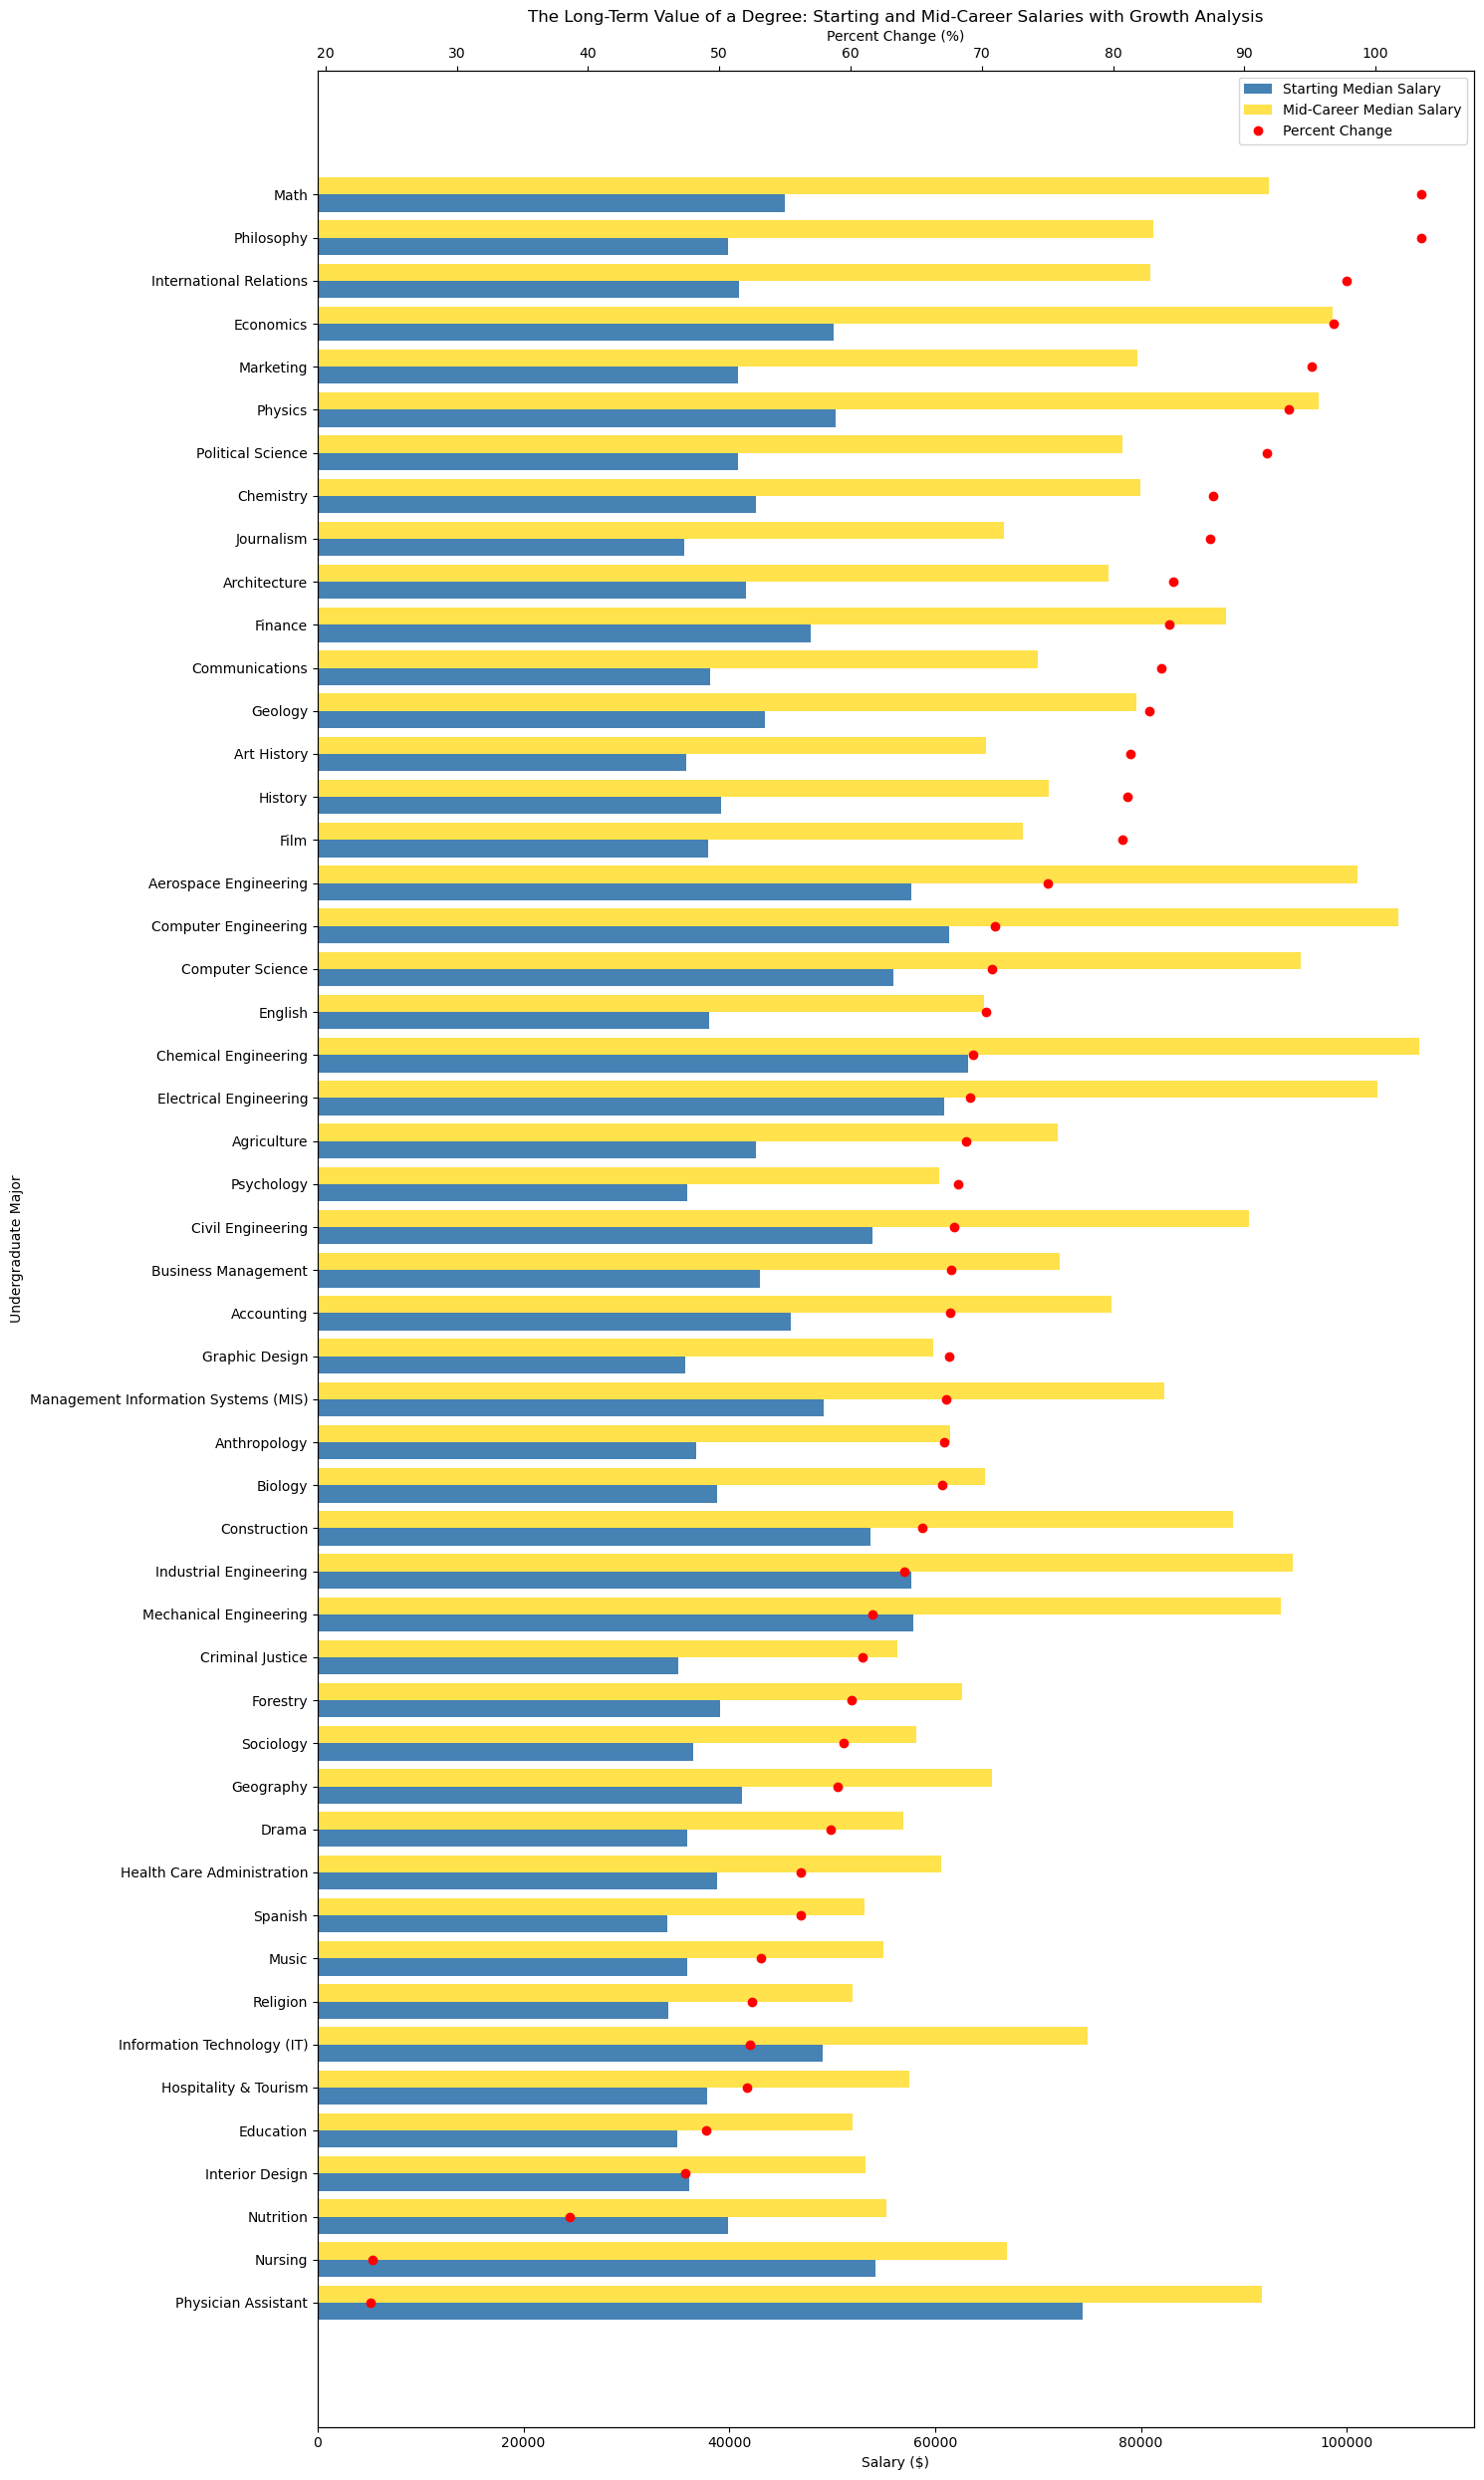

In [3]:
# Sort the dataframe by percent change from starting to mid-career salary
degrees_df = degrees_df.sort_values(by='Percent change from Starting to Mid-Career Salary', ascending=True)

# Plotting
fig, ax = plt.subplots(figsize=(15, 25))

# Create an index for each major
index = np.arange(len(degrees_df['Undergraduate Major']))

# Set bar width
bar_width = 0.4

# Create a bar for starting median salary
bars1 = ax.barh(index - bar_width/2, degrees_df['Starting Median Salary'], bar_width, color='steelblue', label='Starting Median Salary')

# Create a bar for mid-career median salary
bars2 = ax.barh(index + bar_width/2, degrees_df['Mid-Career Median Salary'], bar_width, color='gold', alpha=0.7, label='Mid-Career Median Salary')

# Add a second y-axis for the percent change
ax2 = ax.twiny()

# Plot percent change
line, = ax2.plot(degrees_df['Percent change from Starting to Mid-Career Salary'], index, 'ro', label='Percent Change')

# Labels and Title
ax.set_yticks(index)
ax.set_yticklabels(degrees_df['Undergraduate Major'])
ax.set_xlabel('Salary ($)')
ax.set_ylabel('Undergraduate Major')
ax2.set_xlabel('Percent Change (%)')
plt.title('The Long-Term Value of a Degree: Starting and Mid-Career Salaries with Growth Analysis')

# Combine legends
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='upper right')

# Improve layout
plt.tight_layout()

plt.show()

This graph helps in understanding the long-term value of a degree by comparing starting and mid-career salaries, along with their growth.

<a id="question-2-how-does-mid-career-earnings-compare-to-student-debt-across-majors"></a>
## Question 2: How does mid-career earnings compare to student debt across majors?

Evaluating the return on investment for different degrees involves comparing mid-career earnings to the median student debt.

1. **Identify Mismatched Major Names**: Listing the major names from both datasets side by side to identify any mismatches.
2. **Map the Majors**: Using TF-IDF vectors and cosine similarity to find the best matches for the major names in the two datasets, followed by manual corrections for ambiguous or inconsistently named majors.
3. **Merge the Datasets**: Using the mapped majors, the datasets are merged to analyze the correlation between student debt and salaries.

**Identify Mismatched Major Names**

First, we list the major names from both datasets side by side to identify any mismatches.


In [4]:
undergraduate_majors = degrees_df['Undergraduate Major']
target_majors = debt_df['College Major']
# Determine the maximum length of the lists
max_length = max(len(undergraduate_majors), len(target_majors))

# Print headers
print(f"{'Undergraduate Major':<40} {'Target Major':<60}")

# Print the lists side by side
for i in range(max_length):
    ug_major = undergraduate_majors[i] if i < len(undergraduate_majors) else ''
    target_major = target_majors[i] if i < len(target_majors) else ''
    print(f"{ug_major:<40} {target_major:<60}")

Undergraduate Major                      Target Major                                                
Accounting                               Accounting                                                  
Aerospace Engineering                    Aerospace, Aeronautical, and Astronautical Engineering      
Agriculture                              Agricultural, General                                       
Anthropology                             Animal Sciences                                             
Architecture                             Anthropology                                                
Art History                              Archeology                                                  
Biology                                  Architecture                                                
Business Management                      Arts, Entertainment, and Media Management                   
Chemical Engineering                     Astronomy and Astrophysics               

**Map the Majors**

We use TF-IDF vectors and cosine similarity to find the best matches for the major names in the two datasets. This involves the following steps:

- Create TF-IDF vectors for the major names.
- Compute cosine similarity between the vectors.
- Find the best matches based on cosine similarity.

**Manual Matching of Majors**

Despite the automated matching, some majors require manual matching due to unusual pairings, ambiguous titles, or inconsistencies in naming conventions. Here are some examples of manually matched majors:

- Agriculture: Agricultural, General
- Communications: Communication and Media Studies
- Computer Engineering: Computer & Information Sciences, General
- Construction: City/Urban, Community, and Regional Planning
- Forestry: Botany/Plant Biology
- Geology: Natural Sciences
- Graphic Design: Visual and Performing Arts, General
- Information Technology (IT): Information Science/Studies
- Marketing: Public Relations, Advertising, and Applied Communication
- Math: Mathematics
- Physician Assistant: Health Professions and Related Clinical Sciences, Other
- Religion: Religious Education
- Spanish: General Studies and Humanities

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Pre-matched dictionary remains the same
pre_matched = {'Agriculture': 'Agricultural, General',
 'Communications': 'Communication and Media Studies',
 'Computer Engineering': 'Computer & Information Sciences, General',
 'Construction': 'City/Urban, Community, and Regional Planning',
 'Forestry': 'Botany/Plant Biology',
 'Geology': 'Natural Sciences',
 'Graphic Design': 'Visual and Performing Arts, General',
 'Information Technology (IT)': 'Information Science/Studies',
 'Marketing': 'Public Relations, Advertising, and Applied Communication',
 'Math': 'Mathematics',
 'Physician Assistant': 'Health Professions and Related Clinical Sciences, Other',
 'Religion': 'Religious Education',
 'Spanish': 'General Studies and Humanities'}

# Create TF-IDF vectors
vectorizer = TfidfVectorizer().fit(undergraduate_majors.tolist() + target_majors.tolist())
undergraduate_majors_tfidf = vectorizer.transform(undergraduate_majors.tolist())
target_majors_tfidf = vectorizer.transform(target_majors.tolist())

# Compute cosine similarity
cosine_similarities = cosine_similarity(undergraduate_majors_tfidf, target_majors_tfidf)

# Find the best matches
matches = {}
for i, item in enumerate(undergraduate_majors):
    best_match_index = cosine_similarities[i].argmax()
    best_match = target_majors[best_match_index]
    matches[item] = best_match

# Merge pre_matched with cosine similarity matches
merged_matches = {**matches, **pre_matched}

for key, value in merged_matches.items():
    print(f"{key}: {value}")

Physician Assistant: Health Professions and Related Clinical Sciences, Other
Nursing: Registered Nursing, Nursing Administration, Nursing Research, and Clinical Nursing
Nutrition: Foods, Nutrition, and Related Services
Interior Design: Environmental Design
Education: Education, General
Hospitality & Tourism: Hospitality Administration/Management
Information Technology (IT): Information Science/Studies
Religion: Religious Education
Music: Music
Spanish: General Studies and Humanities
Health Care Administration: Public Health
Drama: Drama/ Theater Arts and Stagecraft
Geography: Geography and Cartography
Sociology: Sociology
Forestry: Botany/Plant Biology
Criminal Justice: Criminal Justice and Corrections
Mechanical Engineering: Mechanical Engineering
Industrial Engineering: Engineering, General
Construction: City/Urban, Community, and Regional Planning
Biology: Biology
Anthropology: Anthropology
Management Information Systems (MIS): Information Science/Studies
Graphic Design: Visual and 

**Merge the Datasets**

Using the mapped majors, we merge the two datasets on the 'College Major' field to analyze the correlation between student debt and salaries.


In [6]:
# Map the 'Undergraduate Major' to 'College Major' using the dictionary
degrees_df['College Major'] = degrees_df['Undergraduate Major'].map(merged_matches)

# Merge the datasets on 'College Major'
merged_df = pd.merge(degrees_df, debt_df[['College Major', '2022 Median Debt']], on='College Major', how='left')

merged_df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,College Major,2022 Median Debt
0,Physician Assistant,74300.0,91700.0,23.4,66400.0,75200.0,108000.0,124000.0,Health Professions and Related Clinical Scienc...,25952.0
1,Nursing,54200.0,67000.0,23.6,47600.0,56400.0,80900.0,98300.0,"Registered Nursing, Nursing Administration, Nu...",22592.0
2,Nutrition,39900.0,55300.0,38.6,33900.0,44500.0,70500.0,99200.0,"Foods, Nutrition, and Related Services",25152.0
3,Interior Design,36100.0,53200.0,47.4,35700.0,42600.0,72500.0,107000.0,Environmental Design,21224.0
4,Education,34900.0,52000.0,49.0,29300.0,37900.0,73400.0,102000.0,"Education, General",28001.0


**Plotting Debt vs. Mid-Career Salary**

Finally, we create a visualization comparing mid-career median salaries with 2022 median student debt for various majors. This plot includes:

- A horizontal bar plot showing median salaries and median debt side by side for each major.
- Scatter points representing the percent change from starting to mid-career salary.

**Debt vs. Dollars: Mid-Career Earnings Compared to Student Debt by Major**


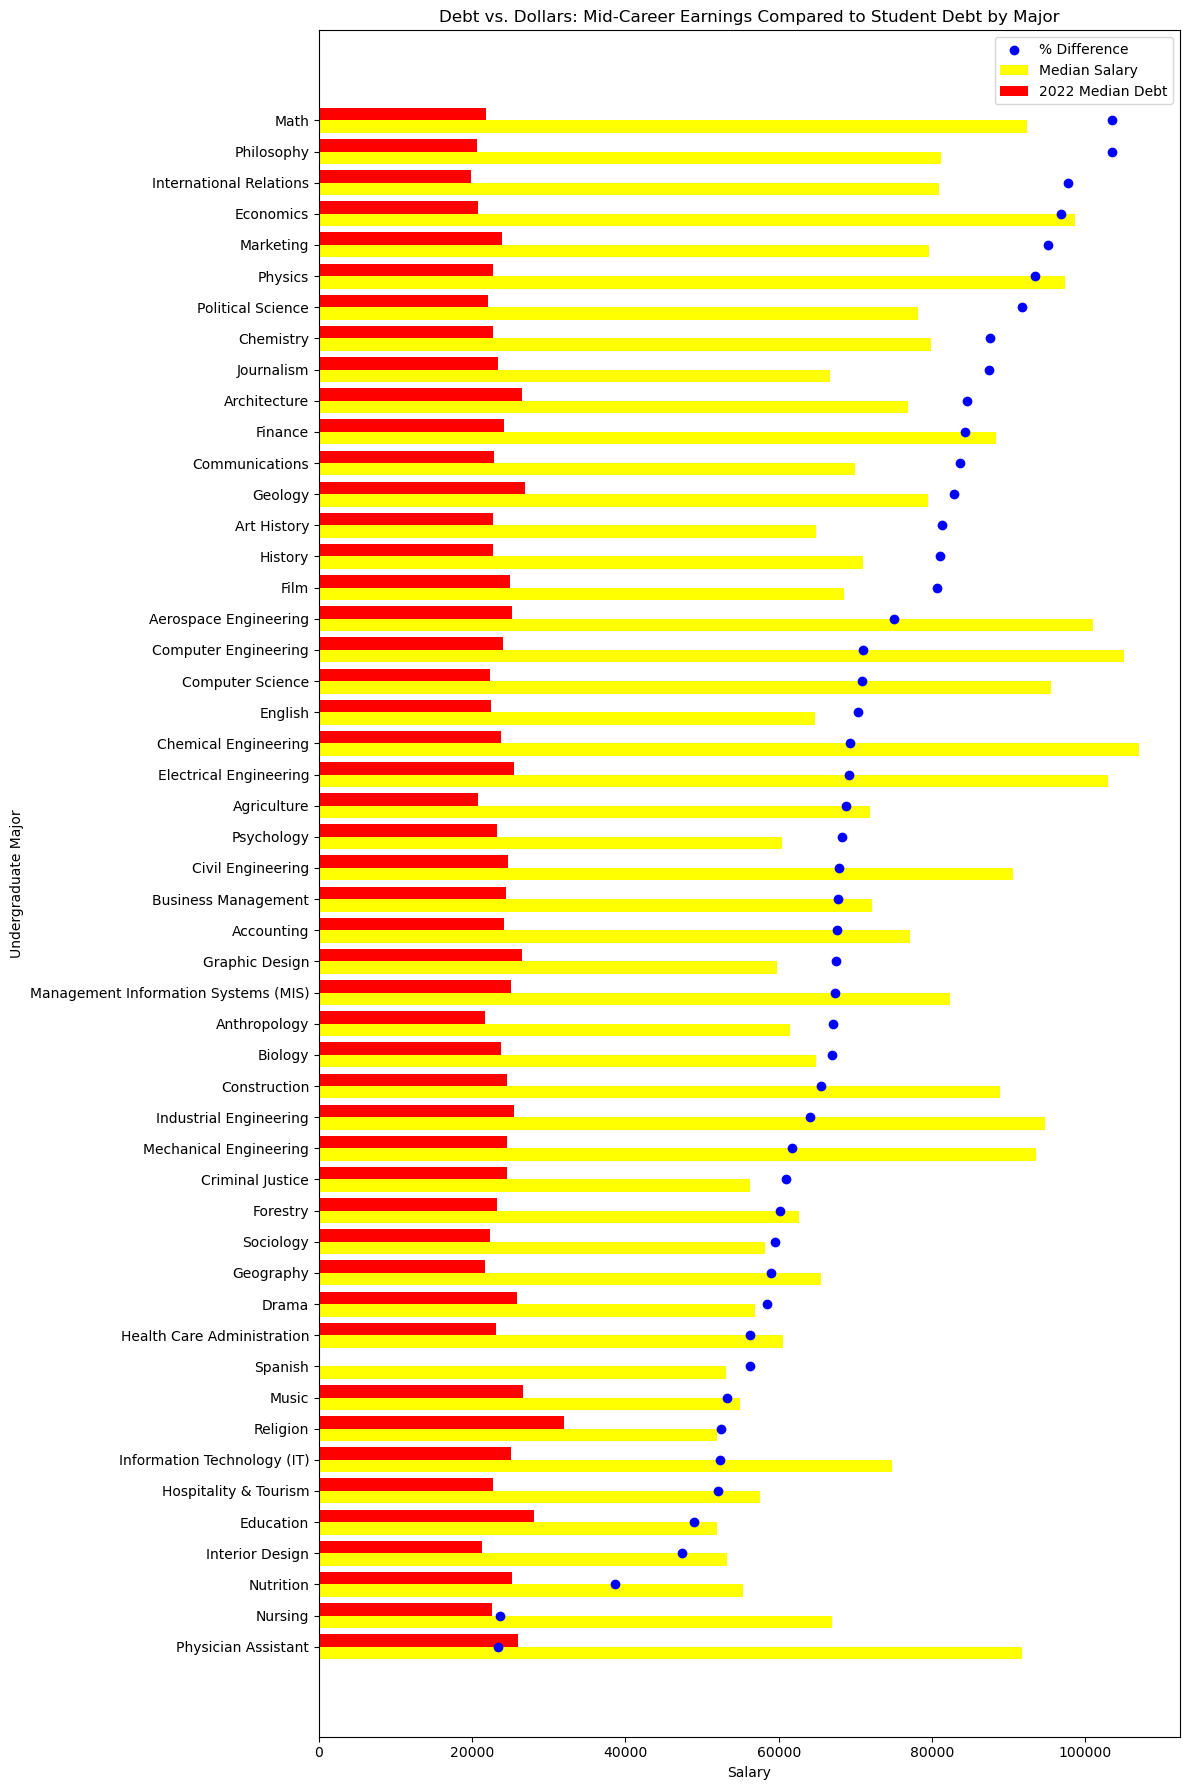

In [7]:
data = merged_df[['Undergraduate Major', 'Mid-Career Median Salary', '2022 Median Debt', 'Percent change from Starting to Mid-Career Salary']]
data = data.rename(columns={'Undergraduate Major': 'Major', 'Mid-Career Median Salary': 'Median Salary', '2022 Median Debt': 'Median Debt', 'Percent change from Starting to Mid-Career Salary': 'Percent Change'})

# Sort data by Percent Change
data = data.sort_values(by='Major')
data = data.sort_values(by='Percent Change')

# Plotting
plt.figure(figsize=(12, 18))
bar_width = 0.4
y_positions = range(len(data))

# Plot bars side by side
plt.barh([p - bar_width / 2 for p in y_positions], data['Median Salary'], height=bar_width, color='yellow', label='Median Salary')
plt.barh([p + bar_width / 2 for p in y_positions], data['Median Debt'], height=bar_width, color='red', label='2022 Median Debt')
plt.scatter(data['Percent Change'] * 1000, y_positions, color='blue', label='% Difference')

# Labels and Title
plt.yticks(y_positions, data['Major'])
plt.xlabel('Salary')
plt.ylabel('Undergraduate Major')
plt.title('Debt vs. Dollars: Mid-Career Earnings Compared to Student Debt by Major')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

This visualization highlights the financial outcomes of different majors by comparing mid-career earnings with associated student debt.

<a id="question-3-how-do-regional-differences-impact-mid-career-earnings"></a>
## Question 3: How do regional differences impact mid-career earnings?


Geographical location can significantly influence salary outcomes. The following boxplot compares mid-career salaries across different regions in the United States.

**Mid-Career Median Salaries by Region**



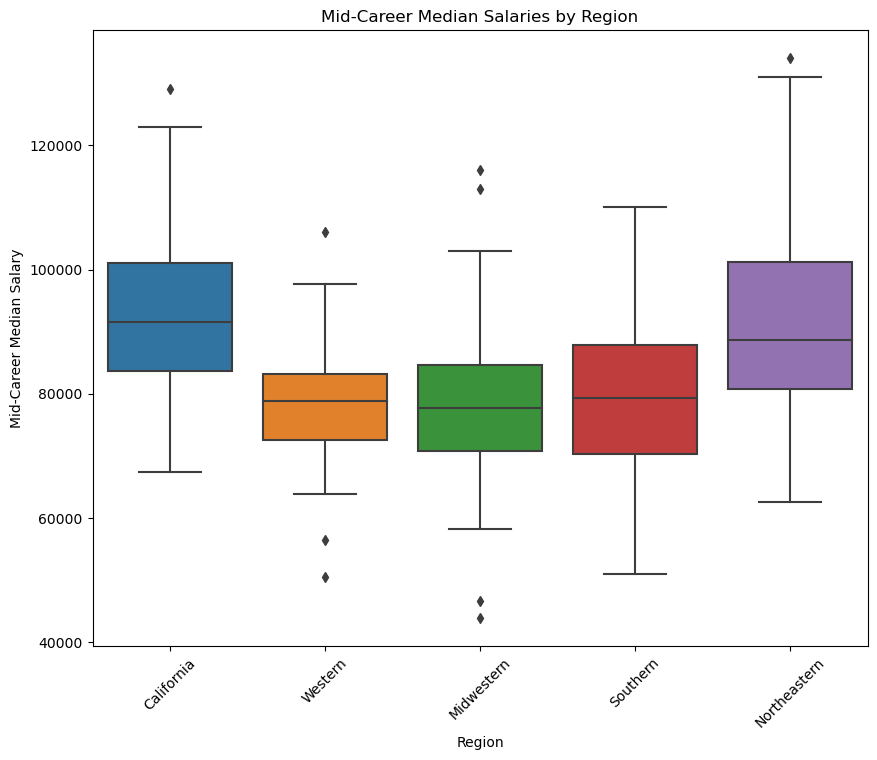

In [8]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=region_df, x='Region', y='Mid-Career Median Salary')
plt.title('Mid-Career Median Salaries by Region')
plt.xlabel('Region')
plt.ylabel('Mid-Career Median Salary')
plt.xticks(rotation=45)
plt.show()

This boxplot shows the mid-career median salaries for different regions, highlighting the central tendency and variability within each region.

<a id="question-4-how-does-the-type-of-college-attended-affect-mid-career-salaries"></a>
## Question 4: How does the type of college attended affect mid-career salaries?

The type of institution attended can also influence salary outcomes. The following boxplot depicts the distribution of mid-career median salaries based on the type of college attended.

**Mid-Career Median Salaries by College Type**



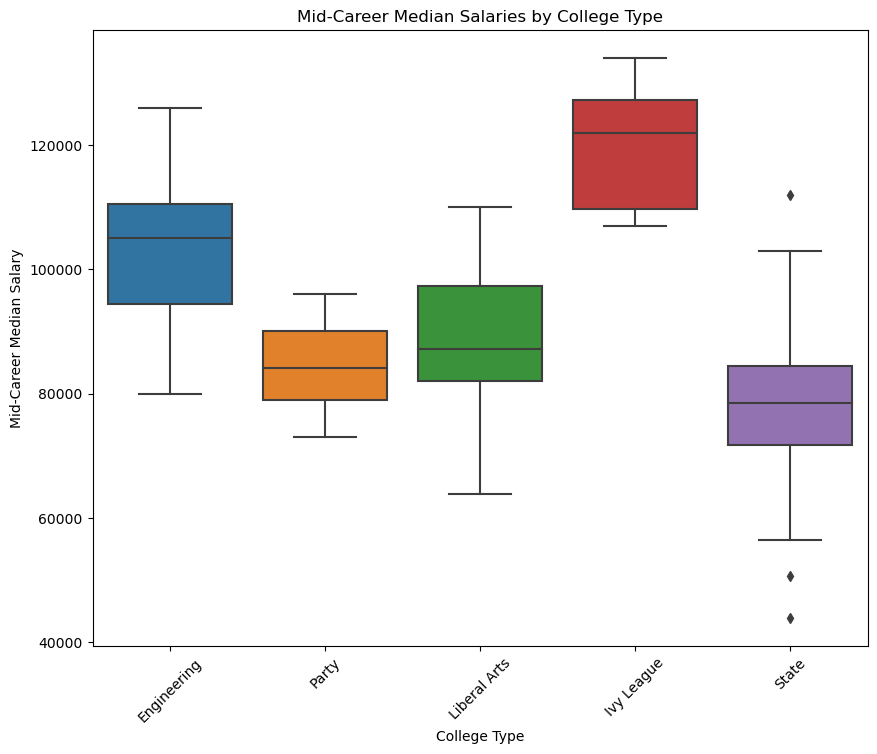

In [9]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=college_type_df, x='School Type', y='Mid-Career Median Salary')
plt.title('Mid-Career Median Salaries by College Type')
plt.xlabel('College Type')
plt.ylabel('Mid-Career Median Salary')
plt.xticks(rotation=45)
plt.show()

This boxplot visualizes the mid-career median salaries for graduates from different types of colleges.


<a id="additional-insight-mid-career-salary-percentiles-across-fields"></a>
## Additional Insight: Mid-Career Salary Percentiles Across Fields

To provide further context on mid-career salaries, the following chart offers a detailed view of salary distribution within each field.

**Majors with Money: Mapping Mid-Career Salary Percentiles Across Fields**


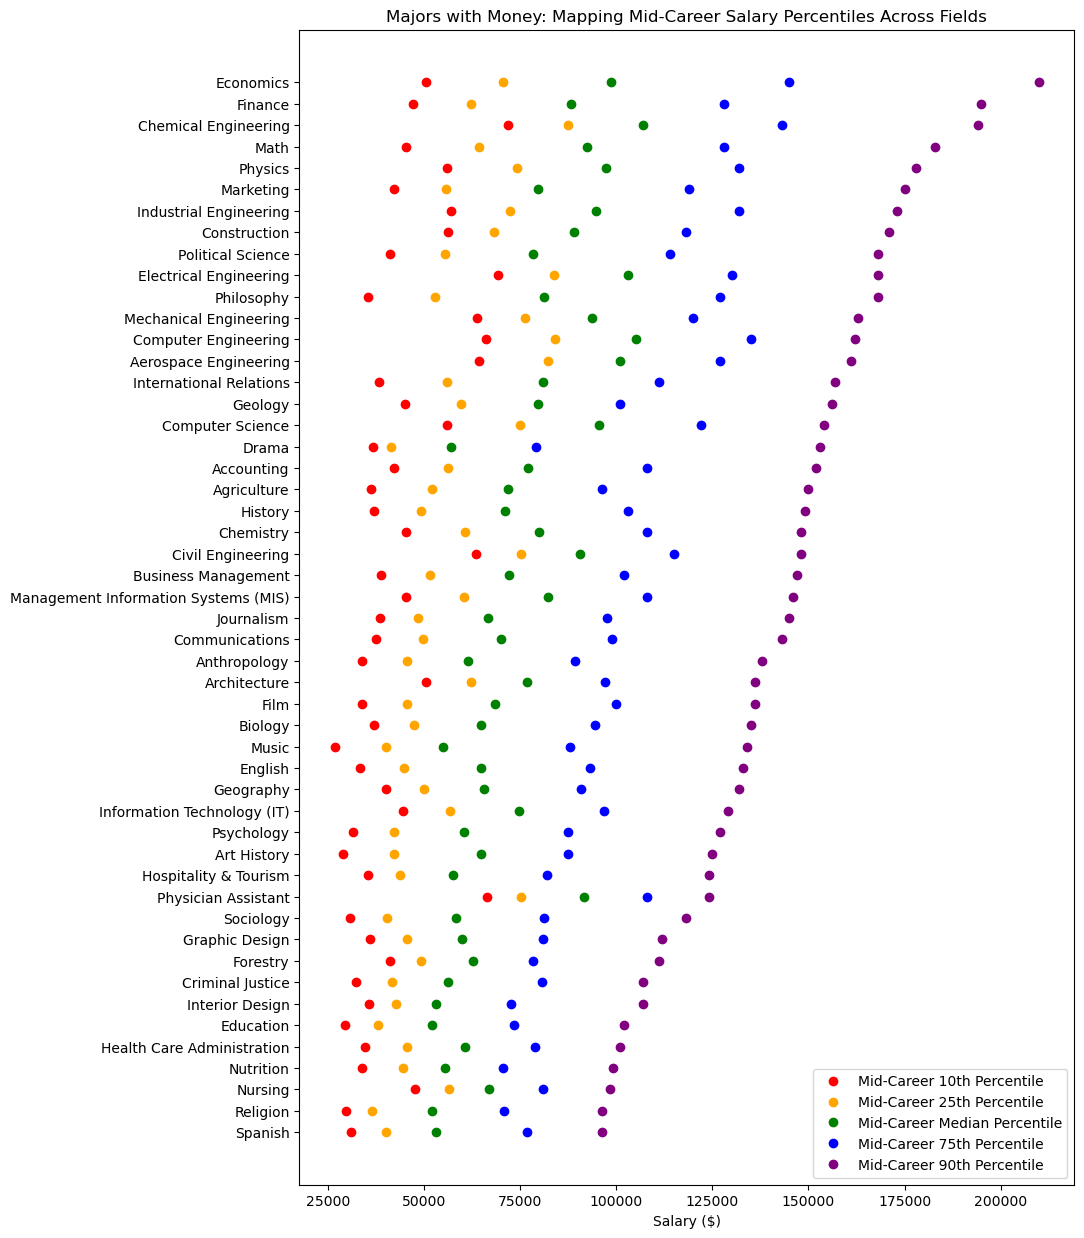

In [12]:
degrees_df = pd.read_csv('degrees-that-pay-back.csv')

# Clean and prepare the data
degrees_df.columns = degrees_df.columns.str.strip()
for column in degrees_df.columns[1:]:
    degrees_df[column] = degrees_df[column].replace('[\$,]', '', regex=True).astype(float)

# Sort the dataframe by Mid-Career 90th Percentile Salary for better visualization
degrees_df = degrees_df.sort_values('Mid-Career 90th Percentile Salary')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 15))

# Define the percentile columns
percentiles = ['Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary',
               'Mid-Career Median Salary', 'Mid-Career 75th Percentile Salary', 
               'Mid-Career 90th Percentile Salary']

colors = ['red', 'orange', 'green', 'blue', 'purple']

for i, percentile in enumerate(percentiles):
    ax.plot(degrees_df[percentile], degrees_df['Undergraduate Major'], 
            'o', label=f'Mid-Career {percentile.split()[1]} Percentile', color=colors[i])

# Customize the plot
ax.set_xlabel('Salary ($)')
ax.set_title('Majors with Money: Mapping Mid-Career Salary Percentiles Across Fields')
ax.legend()

plt.show()



This chart shows the 10th, 25th, 50th, 75th, and 90th percentiles of mid-career salaries for various majors.

<a id="conclusion"></a>
## Conclusion

In this analysis, we explored various aspects of the long-term value of a degree, including salary progression, debt, regional differences, and the impact of college type. Key takeaways include:

- **Salary Growth**: Fields like Math, Physics, and Computer Science offer significant salary growth from starting to mid-career.
- **Debt vs. Earnings**: Majors such as International Relations and Physician Assistant provide a good return on investment, while others like Music and Drama do not.
- **Regional Differences**: California and the Northeastern regions offer higher mid-career salaries compared to other regions.
- **College Type**: Graduates from Engineering schools and Ivy League institutions tend to have higher mid-career earnings.

These insights highlight the importance of considering multiple factors when choosing a major and a college. Prospective students should weigh potential earnings growth, debt, and regional opportunities to make informed decisions about their education and career paths.